# Modeling Exercise: Logistic Regression
## Corey Solitaire
### 9.15.2020

In [1]:
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

from acquire import get_titanic_data
from prepare import prep_titanic_data

# In this exercise, we'll continue working with the titanic dataset and building logistic regression models. Throughout this exercise, be sure you are training, evaluation, and comparing models on the train and validate datasets. The test dataset should only be used for your final model.

# For all of the models you create, choose a threshold that optimizes for accuracy.

In [2]:
# Cleaned Data for Exploration
df = prep_titanic_data(get_titanic_data())

In [3]:
df.dropna(inplace=True)

In [4]:
X = df[['pclass','age','fare','sibsp','parch']]
y = df[['survived']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state = 123)

X_train.head()

,pclass,age,fare,sibsp,parch
605,3,36.0,15.5500,1,0
197,3,42.0,8.4042,0,1
56,2,21.0,10.5000,0,0
645,1,48.0,76.7292,1,0
356,1,22.0,55.0000,0,1


In [5]:
#Baseline for our model
survival_rate = y_train.survived.mean()
survival_rate

0.39959839357429716

### Initial Model:

In [6]:
## Create a logistic regression object

# from sklearn.linear_model import LogisticRegression

logit = LogisticRegression(C=1, class_weight={1:2}, random_state = 123, solver='saga')

In [7]:
# Fit model to traning data

logit.fit(X_train, y_train)

LogisticRegression(C=1, class_weight={1: 2}, random_state=123, solver='saga')

In [8]:
# Print coefficents and intercepts
print('Coefficient: \n', logit.coef_)
print('Intercept: \n', logit.intercept_)

Coefficient: 
 [[-0.02672732 -0.01079506  0.01878237 -0.02695151 -0.00263705]]
Intercept: 
 [0.00526149]


In [9]:
# make a prediction with traning data

y_pred = logit.predict(X_train)
y_pred

array([0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0,

In [10]:
# estimate prob of survival with training data

y_pred_proba = logit.predict_proba(X_train)
y_pred_proba

array([[5.49444966e-01, 4.50555034e-01],
       [5.92207677e-01, 4.07792323e-01],
       [5.19408890e-01, 4.80591110e-01],
       [2.94303077e-01, 7.05696923e-01],
       [3.16168557e-01, 6.83831443e-01],
       [2.32779406e-01, 7.67220594e-01],
       [5.90626797e-01, 4.09373203e-01],
       [5.28304191e-01, 4.71695809e-01],
       [5.08622730e-01, 4.91377270e-01],
       [5.32961281e-01, 4.67038719e-01],
       [3.38910791e-01, 6.61089209e-01],
       [1.40448429e-01, 8.59551571e-01],
       [5.20035170e-01, 4.79964830e-01],
       [2.42687796e-01, 7.57312204e-01],
       [4.89787784e-01, 5.10212216e-01],
       [4.15789367e-01, 5.84210633e-01],
       [5.61388283e-01, 4.38611717e-01],
       [5.33448404e-01, 4.66551596e-01],
       [5.26546041e-01, 4.73453959e-01],
       [1.48741182e-01, 8.51258818e-01],
       [2.56158619e-01, 7.43841381e-01],
       [4.64586678e-01, 5.35413322e-01],
       [5.37987552e-01, 4.62012448e-01],
       [5.34023506e-01, 4.65976494e-01],
       [5.265460

In [11]:
# Compute Accuracy

print('Accuracy of Logistic Regression classifier on training set: {:.2f}'
     .format(logit.score(X_train, y_train)))

Accuracy of Logistic Regression classifier on training set: 0.67


In [12]:
# Create a confusion matrix

print(confusion_matrix(y_train, y_pred))

[[208  91]
 [ 74 125]]


In [13]:
# Compute percision and support

print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.70      0.72       299
           1       0.58      0.63      0.60       199

    accuracy                           0.67       498
   macro avg       0.66      0.66      0.66       498
weighted avg       0.67      0.67      0.67       498



In [14]:
# Compute Accuracy (TEST)

print('Accuracy of Logistic Regression classifier on test set: {:.2f}'
     .format(logit.score(X_test, y_test)))

Accuracy of Logistic Regression classifier on test set: 0.68


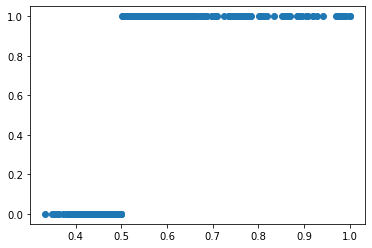

In [15]:
# Visualize what it looks like
y_pred_proba = [i[1] for i in y_pred_proba]
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(y_pred_proba, y_pred)
plt.show()

### 1. Create another model that includes age in addition to fare and pclass. Does this model perform better than your previous one?

In [16]:
df1 = prep_titanic_data(get_titanic_data())
df1.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,embark_town,alone,sex_cat
0,0,3,male,22.0,1,0,7.2500,S,2,0,1
1,1,1,female,38.0,1,0,71.2833,C,0,0,0
2,1,3,female,26.0,0,0,7.9250,S,2,1,0
3,1,1,female,35.0,1,0,53.1000,S,2,0,0
4,0,3,male,35.0,0,0,8.0500,S,2,1,1


In [17]:
X = df1[['pclass','age','fare']]
y = df1[['survived']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state = 123)

X_train.head()

,pclass,age,fare
605,3,36.0,15.5500
197,3,42.0,8.4042
56,2,21.0,10.5000
645,1,48.0,76.7292
356,1,22.0,55.0000


In [18]:
logit = LogisticRegression(C=1, class_weight={1:2}, random_state = 123, solver='saga')
logit.fit(X_train, y_train)

LogisticRegression(C=1, class_weight={1: 2}, random_state=123, solver='saga')

In [19]:
# Print coefficents and intercepts
print('Coefficient: \n', logit.coef_)
print('Intercept: \n', logit.intercept_)

Coefficient: 
 [[-0.02768145 -0.01074826  0.01842133]]
Intercept: 
 [0.0050081]


In [20]:
# make a prediction with traning data
y_pred = logit.predict(X_train)
# estimate prob of survival with training data
y_pred_proba = logit.predict_proba(X_train)

In [21]:
# Compute Accuracy
print('Accuracy of Logistic Regression classifier on training set: {:.2f}'
     .format(logit.score(X_train, y_train)))

Accuracy of Logistic Regression classifier on training set: 0.67


In [22]:
# Create a confusion matrix
print(confusion_matrix(y_train, y_pred))

[[206  93]
 [ 72 127]]


In [23]:
# Compute percision and support
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.69      0.71       299
           1       0.58      0.64      0.61       199

    accuracy                           0.67       498
   macro avg       0.66      0.66      0.66       498
weighted avg       0.68      0.67      0.67       498



In [24]:
# Compute Accuracy (TEST)
print('Accuracy of Logistic Regression classifier on test set: {:.2f}'
     .format(logit.score(X_test, y_test)))

Accuracy of Logistic Regression classifier on test set: 0.70


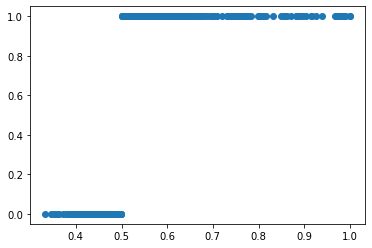

In [25]:
# Visualize what it looks like
y_pred_proba = [i[1] for i in y_pred_proba]
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(y_pred_proba, y_pred)
plt.show()

### 2. Include sex in your model as well. Note that you'll need to encode this feature before including it in a model.

In [26]:
df2 = prep_titanic_data(get_titanic_data())
df2.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,embark_town,alone,sex_cat
0,0,3,male,22.0,1,0,7.2500,S,2,0,1
1,1,1,female,38.0,1,0,71.2833,C,0,0,0
2,1,3,female,26.0,0,0,7.9250,S,2,1,0
3,1,1,female,35.0,1,0,53.1000,S,2,0,0
4,0,3,male,35.0,0,0,8.0500,S,2,1,1


In [27]:
X = df1[['pclass','age','fare','sex_cat']]
y = df1[['survived']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state = 123)

X_train.head()

,pclass,age,fare,sex_cat
605,3,36.0,15.5500,1
197,3,42.0,8.4042,1
56,2,21.0,10.5000,0
645,1,48.0,76.7292,1
356,1,22.0,55.0000,0


In [28]:
logit = LogisticRegression(C=1, class_weight={1:2}, random_state = 123, solver='saga')
logit.fit(X_train, y_train)
# Print coefficents and intercepts
print('Coefficient: \n', logit.coef_)
print('Intercept: \n', logit.intercept_)

Coefficient: 
 [[-0.02657506 -0.00985458  0.01834247 -0.05694321]]
Intercept: 
 [0.00533592]


In [29]:
# make a prediction with traning data
y_pred = logit.predict(X_train)
# estimate prob of survival with training data
y_pred_proba = logit.predict_proba(X_train)
# Compute Accuracy
print('Accuracy of Logistic Regression classifier on training set: {:.2f}'
     .format(logit.score(X_train, y_train)))

Accuracy of Logistic Regression classifier on training set: 0.67


In [30]:
# Create a confusion matrix
print(confusion_matrix(y_train, y_pred))

[[208  91]
 [ 71 128]]


In [31]:
# Compute percision and support
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.70      0.72       299
           1       0.58      0.64      0.61       199

    accuracy                           0.67       498
   macro avg       0.66      0.67      0.67       498
weighted avg       0.68      0.67      0.68       498



In [32]:
# Compute Accuracy (TEST)
print('Accuracy of Logistic Regression classifier on test set: {:.2f}'
     .format(logit.score(X_test, y_test)))

Accuracy of Logistic Regression classifier on test set: 0.70


### 3. Try out other combinations of features and models.

In [33]:
df3 = prep_titanic_data(get_titanic_data())
df3.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,embark_town,alone,sex_cat
0,0,3,male,22.0,1,0,7.2500,S,2,0,1
1,1,1,female,38.0,1,0,71.2833,C,0,0,0
2,1,3,female,26.0,0,0,7.9250,S,2,1,0
3,1,1,female,35.0,1,0,53.1000,S,2,0,0
4,0,3,male,35.0,0,0,8.0500,S,2,1,1


In [34]:
X = df1[['pclass','alone','embark_town','sex_cat']]
y = df1[['survived']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state = 123)

X_train.head()

,pclass,alone,embark_town,sex_cat
605,3,0,2,1
197,3,0,2,1
56,2,1,2,0
645,1,0,0,1
356,1,0,2,0


In [35]:
logit = LogisticRegression(C=1, class_weight={1:2}, random_state = 123, solver='saga')
logit.fit(X_train, y_train)
# make a prediction with traning data
y_pred = logit.predict(X_train)
# estimate prob of survival with training data
y_pred_proba = logit.predict_proba(X_train)
# Compute Accuracy
print('Accuracy of Logistic Regression classifier on training set: {:.2f}'
     .format(logit.score(X_train, y_train)))

Accuracy of Logistic Regression classifier on training set: 0.74


In [36]:
# Create a confusion matrix
print(confusion_matrix(y_train, y_pred))

[[205  94]
 [ 33 166]]


In [37]:
# Compute percision and support
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.69      0.76       299
           1       0.64      0.83      0.72       199

    accuracy                           0.74       498
   macro avg       0.75      0.76      0.74       498
weighted avg       0.77      0.74      0.75       498



In [38]:
# Compute Accuracy (TEST)
print('Accuracy of Logistic Regression classifier on test set: {:.2f}'
     .format(logit.score(X_test, y_test)))

Accuracy of Logistic Regression classifier on test set: 0.76


### 4. Choose you best model and evaluate it on the test dataset. Is it overfit?

### 5. Bonus How do different strategies for handling the missing values in the age column affect model performance?

### 6. Bonus: How do different strategies for encoding sex affect model performance?

### 7. Bonus: scikit-learn's LogisticRegression classifier is actually applying a regularization penalty to the coefficients by default. This penalty causes the magnitude of the coefficients in the resulting model to be smaller than they otherwise would be. This value can be modified with the C hyper parameter. Small values of C correspond to a larger penalty, and large values of C correspond to a smaller penalty.

### Try out the following values for C and note how the coefficients and the model's performance on both the dataset it was trained on and on the validate split are affected.

### C=.01,.1,1,10,100,1000

### Bonus Bonus: how does scaling the data interact with your choice of C?